In [3]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


In [93]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [121]:
bicycle = 'https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases'
page = requests.get(Covid) 

doc = lh.fromstring(page.content) 

tr_elements = doc.xpath('//tr') 

[len(T) for T in tr_elements[:12]] 

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [122]:
tr_elements = doc.xpath('//tr') 

col = [] 
i = 0

for t in tr_elements[0]: 
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Region
2:Places reporting cases
3:Sum of Cases
4:Sum of Deaths
5:Confirmed cases during the 14-days
			of the reporting  period 
6:Reporting period
			YYYY-WW


In [123]:
for j in range(1,len(tr_elements)): 
    T = tr_elements[j] 
    
    if len(T)!=6: 
        break
        
    i = 0 
    
    for t in T.iterchildren(): 
        data=t.text_content()
            
        col[i][1].append(data) 
            
        i+=1 

In [98]:
[len(C) for (title,C) in col]

[224, 224, 224, 224, 224, 224]

In [99]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [100]:
df.head()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
0,Africa,Algeria,265897,6875,56,2022-21 and 2022-22
1,,Angola,99761,1900,328,2022-21 and 2022-22
2,,Benin,26952,163,0,2022-21 and 2022-22
3,,Botswana,306716,2703,0,2022-21 and 2022-22
4,,Burkina_Faso,20899,384,0,2022-21 and 2022-22


In [101]:
df.tail()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
219,,Tuvalu,3,0,0,2022-21 and 2022-22
220,,Vanuatu,10061,14,1379,2022-21 and 2022-22
221,,Wallis_and_Futuna,454,7,0,2022-21 and 2022-22
222,Other,Cases_on_an_international_conveyance_Japan,705,6,0,2022-21 and 2022-22
223,Total,,531470423,6318391,6705497,


In [107]:
df.describe()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
count,224,224,224,224,224,224
unique,8,224,223,208,191,2
top,,Algeria,3,0,0,2022-21 and 2022-22
freq,217,1,2,6,23,223


In [103]:
df.shape

(224, 6)

In [110]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
dfc =df.drop([df.index[0]])
dfc.head()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
1,,Angola,99761,1900,328,2022-21 and 2022-22
2,,Benin,26952,163,0,2022-21 and 2022-22
3,,Botswana,306716,2703,0,2022-21 and 2022-22
4,,Burkina_Faso,20899,384,0,2022-21 and 2022-22
5,,Burundi,42248,15,642,2022-21 and 2022-22


In [117]:
dfc.dtypes

Region                                                                 object
Places reporting cases                                                 object
Sum of Cases                                                           object
Sum of Deaths                                                          object
Confirmed cases during the 14-days\n\t\t\tof the reporting  period     object
Reporting period\n\t\t\tYYYY-WW                                        object
dtype: object

Text(0.5, 1.0, 'Sum of Deaths')

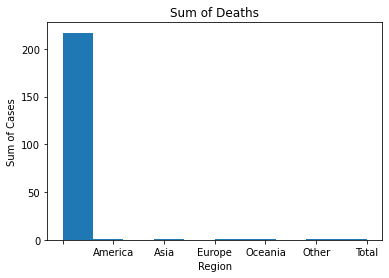

In [119]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dfc["Region"])

# set x/y labels and plot title
plt.pyplot.xlabel("Region")
plt.pyplot.ylabel("Sum of Cases")
plt.pyplot.title("Sum of Deaths")